# Data Analysis and Visualization (cells 1-5)

In [1]:
#imports

import pandas as pd
import numpy as np
import csv
from datetime import datetime
import re
from matplotlib import pyplot as plt
from collections import defaultdict 
from collections import Counter
import spacy

# Cell 1

In Cell 1 below, we begin to clean our data, sorting it by the dates each ticket was filed by the customer.

Clearly, much of the original dataset had either missing information, or irrelevant information.  Therefore, we removed tickets that had any missing information.  In addition, after sorting the data by timeline, we can see that the relevant data that we will use will be from 2013-2020, because this is where most of the tickets are from.   

In [2]:
# CELL 1 CODE

# LOAD, CLEAN AND SORT DATA

# load the data
with open("SEPTA_crm_export-2.csv", "r") as file:
    reader = csv.reader(file)
    data = list(reader)

# get only the tickets that have fully populated information (still over 100,000 of them).
NL = []
for lis in data[1:]:
    if len(lis) == 32:
        NL.append(lis)
        
# put into dataframe.
df = pd.DataFrame(NL, columns = data[0])

# create time stamps for the year variable
l = []
for item in df["customer_incident_date_time"]:
    if item:
        # turn the string into a datetime object
        dto = datetime.strptime(item, "%m/%d/%Y %H:%M:%S")
        l.append(dto)
    # if the data is empty, must keep length of dataframe the same
    else:
        l.append(None)
df["customer_incident_date_time"] = l

# sort the dataframe by timestamp. This helped understand our years with most of the info 2013 - 2020
df2 = df.sort_values(by = "customer_incident_date_time", axis = 0)
df3 = df2.reset_index(drop = True)

#check out the dataframe, the first and last several times are irrelevant and may not be used further.
df3

,cs_ticket_number,how_received,contact_id_c,customer_incident_date_time,mode,route,destination,block_train,vehicle,event,...,esms,titleiv,protected_class,created_date,type,code,department,status,group_code,location
0,695025,Web,,0009-01-10 14:39:00,Trolley,101,Media,train,,,...,false,false,false,01/18/2015 05:57:00,Complaint,65-quality-life,Other Depts,Closed,QualityOfLife,Police
1,644376,Web,,0013-01-01 22:58:00,Regional Rail,CHE,Chestnut Hill East,,2760,,...,false,false,false,12/11/2013 15:57:16,Commendation,C1-courteous,Regional Rail,Closed,Employee,CHE
2,639009,Web,,0013-10-22 21:15:00,CCT,,,,CCT bus,,...,false,false,false,10/27/2013 22:46:22,Complaint,26-cct-same-day,CCT,Closed,Service,CCT
3,641783,Web,,0013-11-01 22:05:00,Regional Rail,WIL,,,9243,,...,false,false,false,11/18/2013 19:45:14,Complaint,65-quality-life,Cust Service,Closed,QualityOfLife,Customer Service
4,645464,Web,,0013-12-19 00:30:00,SubEl,,,,,,...,false,false,false,12/19/2013 14:13:11,Complaint,02-job-performance,SubEl,Closed,Employee,SubEl Stations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110208,765973,Web,,None,1,1,1,1,1,,...,false,false,false,03/31/2016 18:41:19,Commendation,,,Open,,
110209,765702,Web,,None,1,1,1,1,"\+response.write(9822613*9424304)+\""""",,...,false,false,false,03/31/2016 18:17:37,Complaint,,,Open,,
110210,765609,Web,,None,,,1,,,,...,false,false,false,03/31/2016 18:10:05,Travelinfo,,,Open,,
110211,714555,Web,,None,,,,,,,...,false,false,false,06/04/2015 14:54:00,Travelinfo,,,Open,,


# Cell 2

In the code and graph below we are able to see that most of the complaints are actually in years 2015 to 2019.  Each year in that range shows a relatively similar amount. This is probably the timeline of data we will look at. In 2018 there were almost 12,000 complaints (roughly 250 per week week!).  

We also counted the number of tickets that were not filed as complaints, but rather as commendations or complements.  The activity for these types of tickets is highest in 2015 - 2019 as well.

We are beginning to get a strong grasp on the range and volume we can use for our dataset.

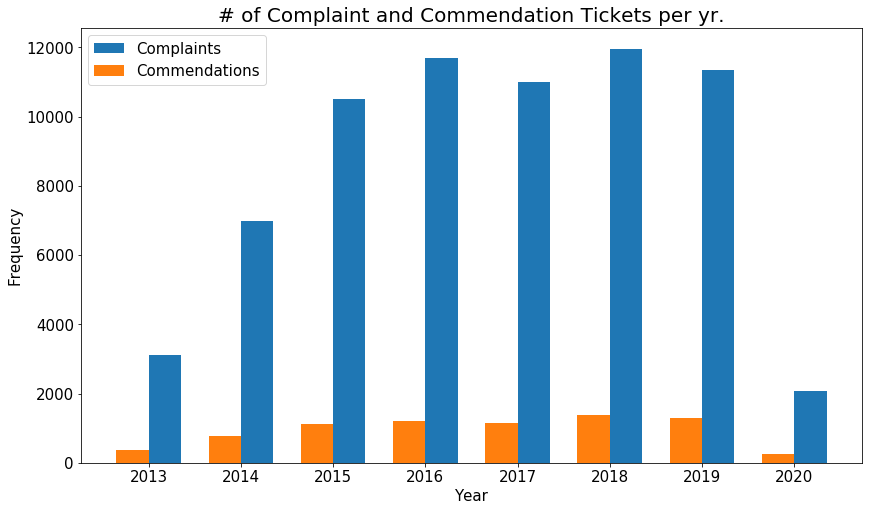

In [3]:
# CELL 2 CODE

# COUNT THE NUMBER OF COMPLAINTS (and commendations) PER YEAR AND GRAPH THEM

comp = Counter()
comm = Counter()

# count how many complaints and commendations exist for each year in our dataframe.
for date, typee in zip(df3["customer_incident_date_time"], df["type"]):
    if date == None or date.year < 2013:
        pass
    else:
        if typee == "Complaint":
            comp[date.year] += 1
        elif typee == "Commendation":
            comm[date.year] += 1

complaints = []
commendations = []
for key,value in comp.items():
    complaints.append(value)
for key,value in comm.items():
    commendations.append(value)
years = [2013, 2014, 2015, 2016, 2017, 2018,2019,2020]   
    
# GRAPH
bar_fig = plt.figure(figsize = (14, 8))
x = range(len(complaints))
plt.bar(x, height = complaints, width = .35, align = "edge", tick_label = years, label = "Complaints")
plt.bar(x, height = commendations, width = -.35, align = "edge", tick_label = years, label = "Commendations")
plt.tick_params(labelsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.xlabel("Year", fontsize = 15)
plt.title("# of Complaint and Commendation Tickets per yr.", fontsize = 20)
plt.legend(fontsize = 15)
print()

# Cell 3

Our analysis shows that there about 76 different SEPTA locations that received complaints over time.  The graph below shows that there are a few locations that have a very large amount of complaints.  When building a predictive model, and using our "location" variable, we can take in to account that it is more weighted towards a couple of specific places.  In general, it is a distribution that helps explain how many locations and the weights of the different locations that we are dealing with.

Our mean and median lines on the graph show the average amount of complaints at each location that has gotten at least one complaint.

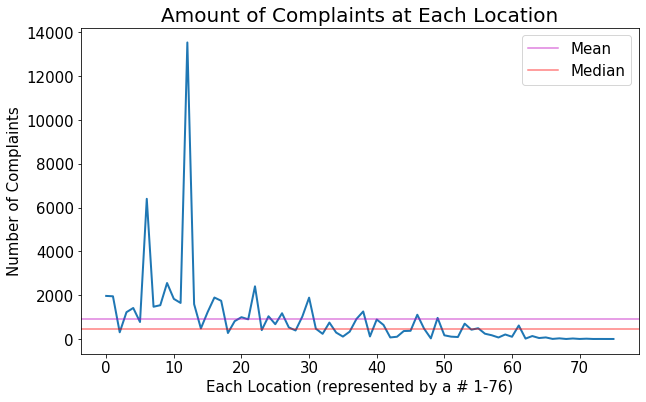

In [4]:
# CELL 3 CODE

# COUNT AND GRAPH THE COMPLAINTS PER LOCATION

# this code shows there are 83 TOTAL locations.
locations = []
for location in df3["location"]:
    if location not in locations:
        locations.append(location)

# lets count locations that actually have complaints
locations = Counter()
for typee,location in zip(df3["type"], df["location"]):
    if typee == "Complaint":
        locations[location] = locations[location] + 1
        
loc_l = []
count_l = []
for locs, counts in locations.items():
    # a couple locations were not locations, but sentences.
    if len(locs) < 100:
        loc_l.append(locs)
        count_l.append(counts)

# mean and median number of complaints at each location that has at lease one complaint.
mean = np.mean(count_l)
median = np.median(count_l)

# GRAPH
_= plt.figure(figsize = (10,6))
plt.plot(range(76), count_l, linewidth = 2)
plt.title("Amount of Complaints at Each Location", fontsize = 20)
plt.ylabel("Number of Complaints", fontsize = 15)
plt.xlabel("Each Location (represented by a # 1-76)", fontsize = 15)
plt.tick_params(labelsize = 15)

# vertical lines
plt.axhline(mean, color = 'm', linewidth = 1.5, alpha = .5, label = "Mean")
plt.axhline(median, color = 'r', linewidth = 1.5, alpha = .5, label = "Median")
plt.legend(fontsize = 15)



# Cell 4

Below, we have created a Counter Structure for every single complaint.  This takes too long to load for over 100,000 tickets, so we may have to alter our method.  However, below, we will take a sample of the tickets (it takes under 40 seconds to run 1000 complaints) and see how often designated key_words occur in each complaint.  We have picked a couple of key words that may possibly play a role in our analysis (i.e key_words = {"delays", "delayed", "problem", "septa", "conductor"})

Based on the graph, we can see that we have picked relevant key_words.  Over 1,000 complaints, there is a pretty consistent usage of the words.  There are a handful of outlier complaints that use the key_words over 10 times or that don't use them at all, but most of the other complaints are within that range (between 0-10).  Additionally, there is still plenty of variance in the frequency of each complaint, allowing for further comparison.  A possible next step would be to take a moving average of our curve in order to get a smoother curve that is a bit more readable.  (We also imported a stop words module, added our own words to the modules set of words, and removed this from our Counter Structures)

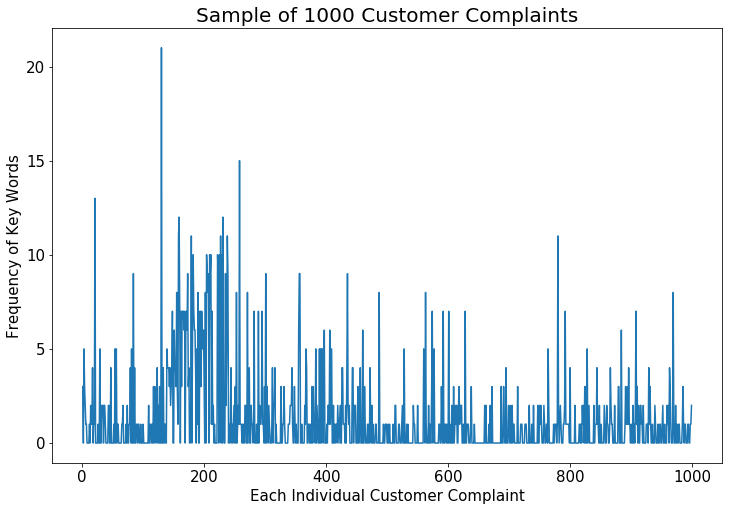

In [5]:
# CELL 4 CODE

# Counter Structure for each day.

# load spacy and remove our stop words
nlp = spacy.load("en")
from nltk.corpus import stopwords 
stop_words2 = set(stopwords.words('english'))
stop_words = {'\n', ',', '.', '`',"?",'the', 'and', 'of'}
stop_w = stop_words2.union(stop_words)

# create counter for each ticket
def count_f(string, counter2):
    doc = nlp(string)
    for token in doc:
        if token.text not in stop_w:
            counter2[token.text] += 1
    return counter2

# iterate through 1,000 complaints and call the counter function.
l = []
for complaint in df3["customer_text_description"][1:1000]:
    if complaint == None:
        l.append(None)
    else:
        counter5 = Counter()
        counter5 = count_f(complaint, counter5)
        l.append(counter5)

# use our counter structures above to see how many times our key_words occurred in each of them.
key_words = {"delays", "delayed", "problem", "septa", "conductor"}
complaint = 0
complaint_number = []
total_f = []
for counter in l:
    total = 0
    for word, count, in counter.items():
        word = word.lower().strip()
        if word in key_words:
            total = total + count
    total_f.append(total)
    complaint = complaint + 1
    complaint_number.append(complaint)

# GRAPH
_= plt.figure(figsize = (12,8))
plt.plot(complaint_number, total_f)
plt.title("Sample of 1000 Customer Complaints", fontsize = 20)
plt.ylabel("Frequency of Key Words", fontsize = 15)
plt.xlabel("Each Individual Customer Complaint", fontsize = 15)
plt.tick_params(labelsize = 15)

# Cell 5

In CELL 5, we use a histogram to show that most of the customer complaints range from 100-200 in character length.  However, there are quite a few complaints that are longer than this, the curve is skewed strongly to the right.  One may interpret that a longer complaint is an angrier complaint, and may deserve more weight in future analysis.  Once again, we will have to decide how much weight we would really want to put on this type of analysis.  

The graph is skewed to the right which is pulling the mean up above the median.  Our outliers in our graph (3 times the std above our mean), which seem to be complaints that are just over 2,000 characters, may end up being data that we do not use.

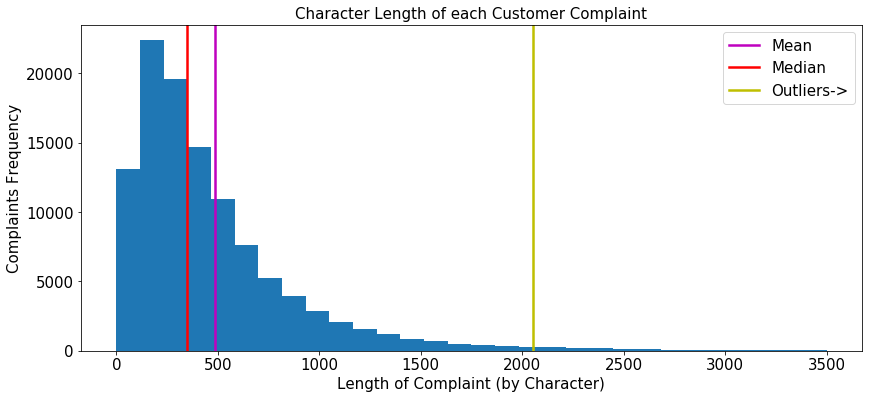

In [6]:
# CELL 5 CODE

chars_in_complaint = []
for complaint in df3["customer_text_description"]:
    chars_in_complaint.append(len(complaint))

mean2 = np.mean(chars_in_complaint)
median2 = np.median(chars_in_complaint)
sta_d = np.std(chars_in_complaint)
outliers = (mean2 + (3 * sta_d))
   
    
# GRAPH
hist_fig = plt.figure(figsize = (14, 6))
    
plt.hist(chars_in_complaint, bins = 30, range = [0,3500])

plt.title("Character Length of each Customer Complaint", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.ylabel("Complaints Frequency", fontsize = 15)
plt.xlabel("Length of Complaint (by Character)", fontsize = 15)\

plt.axvline(mean2, color = 'm', linewidth = 2.5, label = "Mean")
plt.axvline(median2, color = 'r', linewidth = 2.5, label = "Median")
plt.axvline(outliers, color = 'y', linewidth = 2.5, label = "Outliers->")
plt.legend(fontsize = 15)